# Instaling dependancy



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb

## 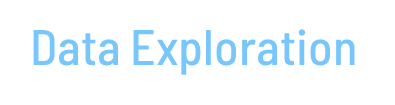

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Task_2/Train_data.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Task_2/test_data.csv')


In [ ]:
# Separate features and target variable from training and test data earlyX_train = train_df.drop('Disease', axis=1)
y_train = train_df['Disease']


In [ ]:

X_test = test_df.drop('Disease', axis=1)
y_test = test_df['Disease']

# Handle missing values
y_train.dropna(inplace=True)
X_train = X_train.iloc[y_train.index]

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
train_df.head()


,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


In [ ]:
train_df.tail()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
2346,0.012956,0.336925,0.451218,0.175006,0.734664,0.382770,0.656463,0.177502,0.808162,0.684499,...,0.670665,0.311568,0.595083,0.155866,0.885812,0.636125,0.132226,0.716519,0.006121,Diabetes
2347,0.407101,0.124738,0.983306,0.663867,0.361113,0.663716,0.232516,0.341056,0.847441,0.309766,...,0.491185,0.701914,0.218104,0.790341,0.570902,0.339125,0.310964,0.310900,0.622403,Thalasse
2348,0.344356,0.783918,0.582171,0.996841,0.065363,0.242885,0.658851,0.543017,0.290106,0.838722,...,0.141738,0.155871,0.473638,0.250535,0.387197,0.344728,0.606719,0.395145,0.134021,Anemia
2349,0.351722,0.014278,0.898615,0.167550,0.727148,0.046091,0.900434,0.136227,0.134361,0.279219,...,0.570553,0.171245,0.858352,0.362012,0.290984,0.996873,0.882164,0.411158,0.146255,Diabetes
2350,0.032726,0.053596,0.102633,0.221356,0.153956,0.216573,0.312577,0.608940,0.486174,0.450700,...,0.188750,0.331887,0.562622,0.680462,0.099538,0.982893,0.437285,0.288961,0.709262,Anemia


Note: they are all numerical values except 'Disease'

In [ ]:
train_df.columns


Index(['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets',
       'White Blood Cells', 'Red Blood Cells', 'Hematocrit',
       'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin',
       'Mean Corpuscular Hemoglobin Concentration', 'Insulin', 'BMI',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Triglycerides',
       'HbA1c', 'LDL Cholesterol', 'HDL Cholesterol', 'ALT', 'AST',
       'Heart Rate', 'Creatinine', 'Troponin', 'C-reactive Protein',
       'Disease'],
      dtype='object')

In [ ]:
train_df.shape

(2351, 25)

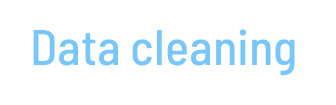

find average values to either remove zero values or replace with the mean value

In [ ]:
train_df.describe()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
count,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,...,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000
mean,0.362828,0.393648,0.586190,0.504027,0.511086,0.506590,0.507152,0.492200,0.484459,0.562273,...,0.374373,0.439112,0.421777,0.546079,0.434972,0.452138,0.582255,0.425075,0.454597,0.430308
std,0.251889,0.239449,0.271498,0.303347,0.277270,0.266565,0.285537,0.275735,0.315618,0.273281,...,0.256981,0.263779,0.252124,0.269511,0.267388,0.242075,0.250915,0.229298,0.251189,0.243034
min,0.010994,0.012139,0.003021,0.012594,0.010139,0.044565,0.011772,0.046942,0.000554,0.006947,...,0.005217,0.016256,0.033037,0.039505,0.007186,0.013013,0.114550,0.021239,0.007490,0.004867
25%,0.129198,0.195818,0.346092,0.200865,0.259467,0.263589,0.288132,0.287532,0.207938,0.355774,...,0.184604,0.188750,0.217757,0.307132,0.211078,0.239659,0.339125,0.213026,0.288961,0.196192
50%,0.351722,0.397083,0.609836,0.533962,0.527381,0.467431,0.493428,0.453052,0.420723,0.603635,...,0.317857,0.466375,0.413071,0.512941,0.373235,0.486317,0.610860,0.417295,0.426863,0.481601
75%,0.582278,0.582178,0.791215,0.754841,0.743164,0.743670,0.753657,0.722293,0.778160,0.741381,...,0.572330,0.652514,0.604753,0.779378,0.710319,0.616181,0.800666,0.606719,0.682164,0.631426
max,0.968460,0.905026,0.983306,0.999393,0.990786,1.000000,0.977520,0.995263,0.963235,0.975586,...,0.973679,0.950218,0.983826,0.989411,0.942549,0.994460,0.996873,0.925924,0.972803,0.797906


In [ ]:
train_df.isnull().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

No zero values the data is clean

Convert all columns to numeric, coerce errors to NaN

In [ ]:
train_df = train_df.apply(pd.to_numeric, errors='coerce')
test_df = test_df.apply(pd.to_numeric, errors='coerce')

In [ ]:
# Handle missing values by filling with median of each column
train_df = train_df.fillna(train_df.median())
test_df = test_df.fillna(test_df.median())


In [ ]:
train_df.shape

(2351, 25)

it has decreased due to cleaning data  

# Visualization

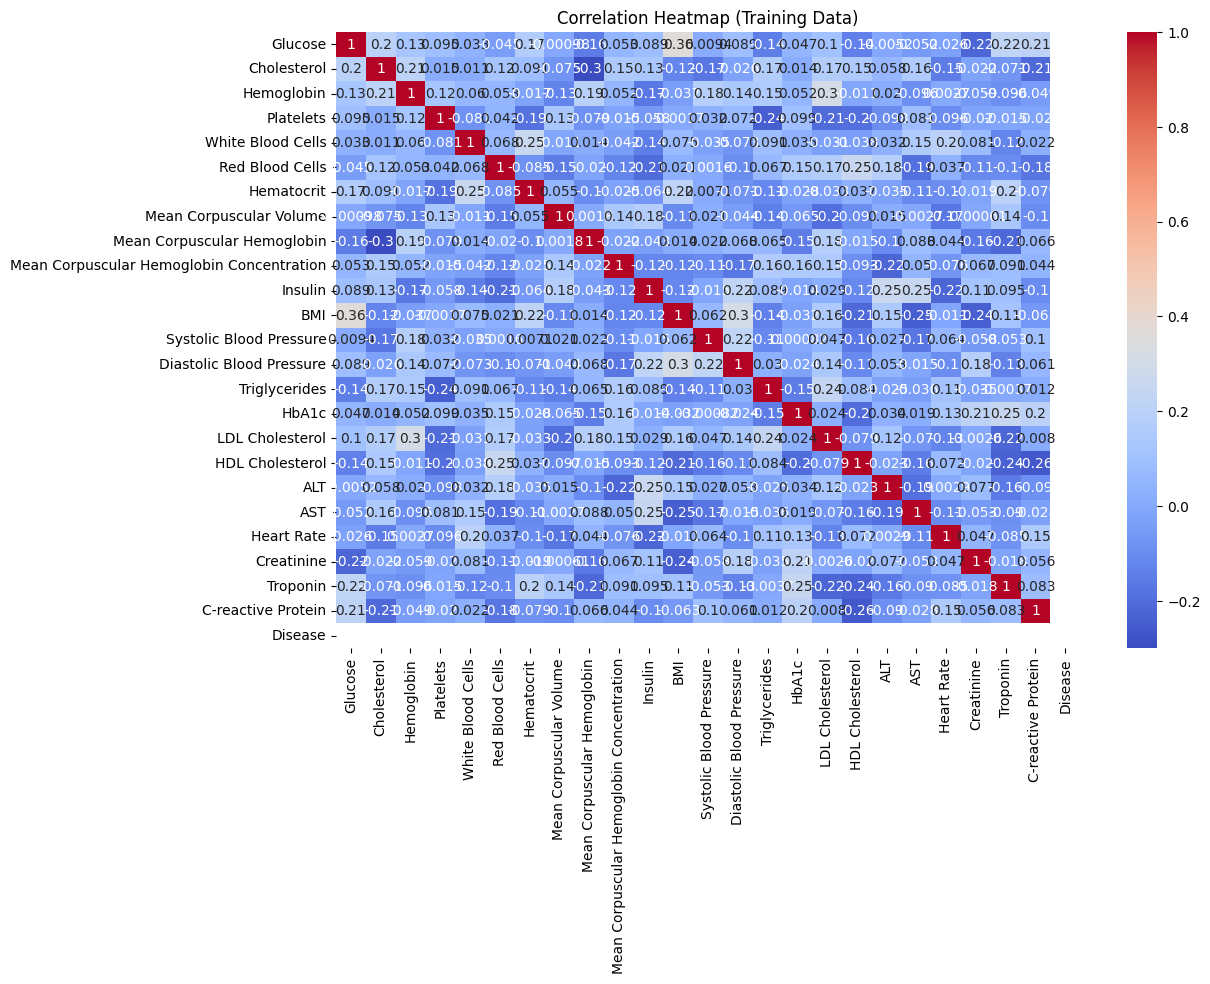

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Training Data)")
plt.show()

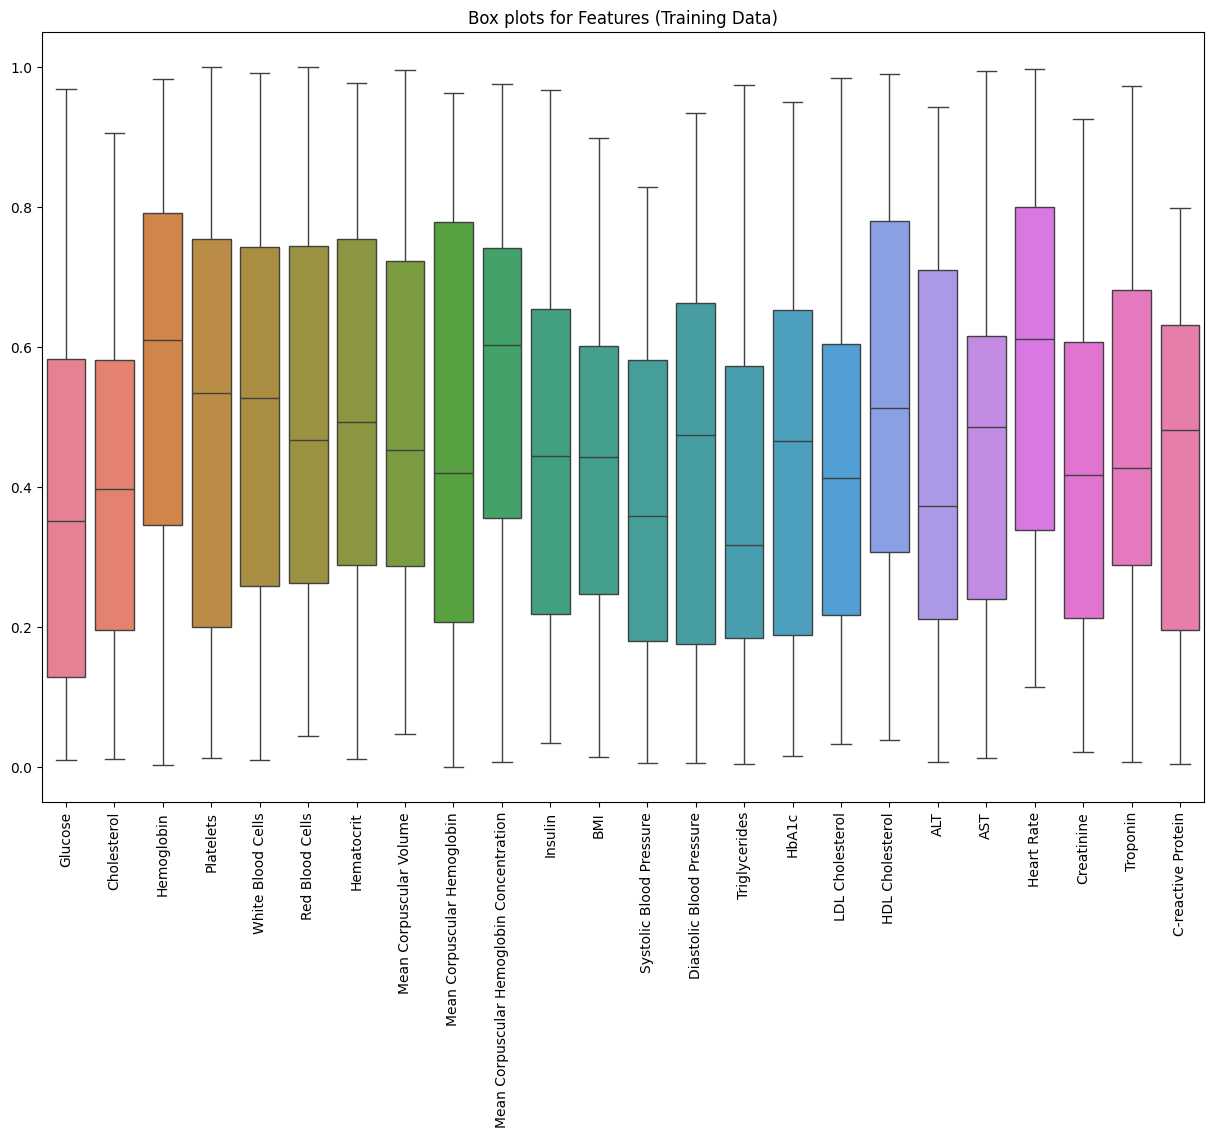

In [ ]:
# Box plots to identify outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=train_df.drop(columns='Disease'))
plt.xticks(rotation=90)
plt.title("Box plots for Features (Training Data)")
plt.show()


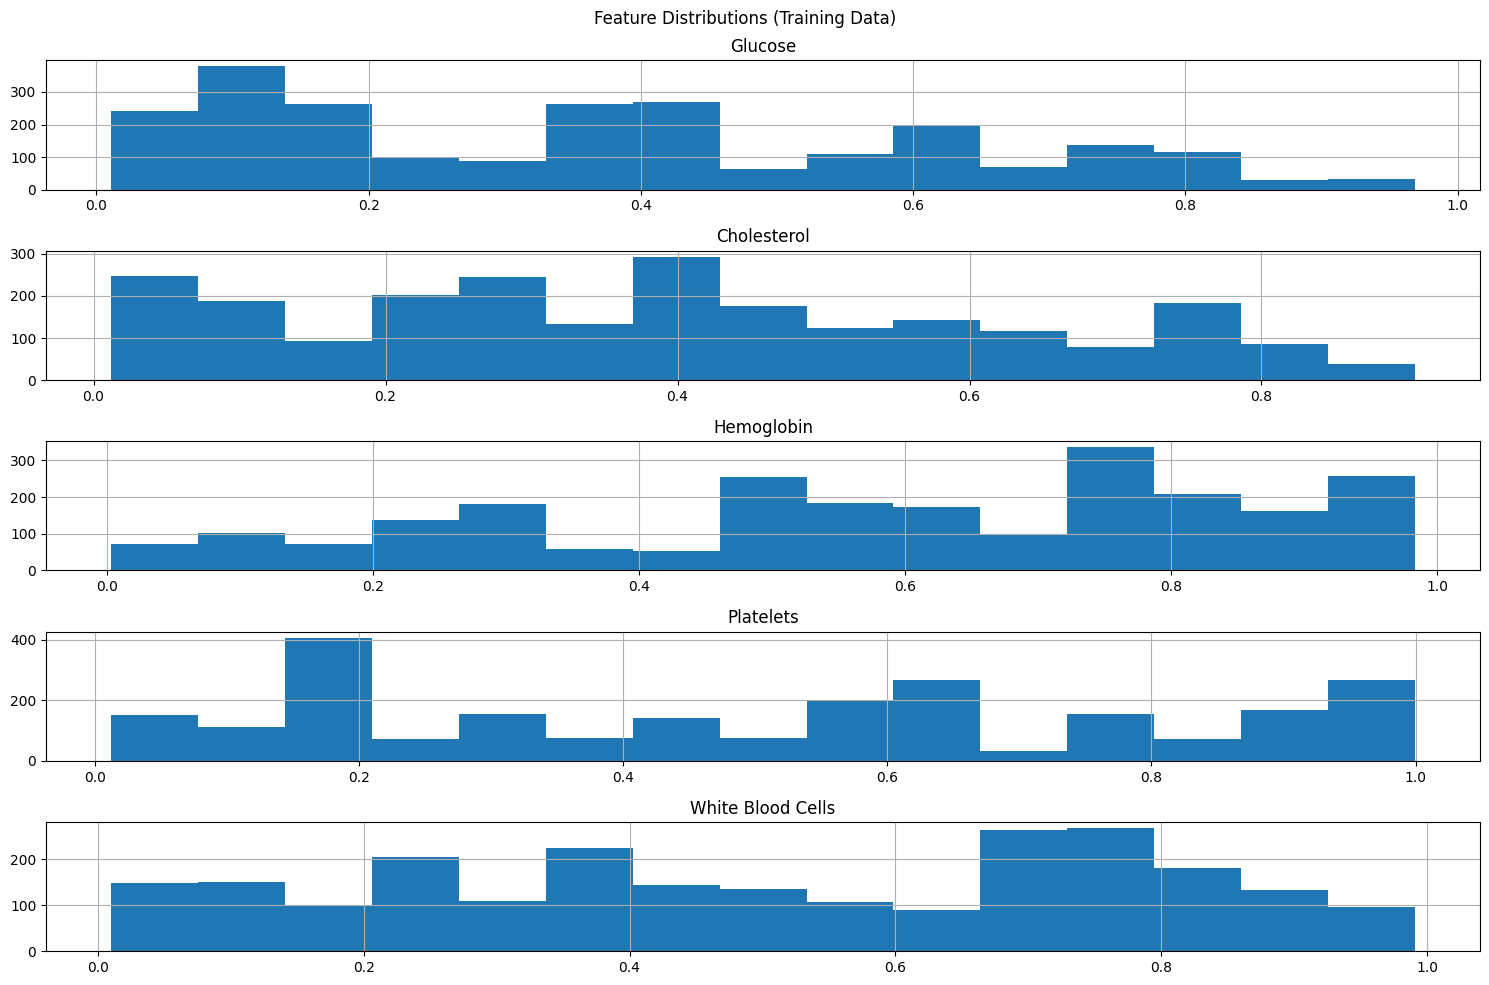

In [ ]:
# Separate histograms for the first 5 features
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15, 10))
for i, col in enumerate(train_df.columns[:5]):
    ax = axes[i]
    train_df[col].hist(bins=15, ax=ax)
    ax.set_title(col)
plt.suptitle("Feature Distributions (Training Data)")
plt.tight_layout()
plt.show()

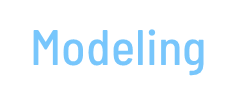

# Logistic Regression Model

In [ ]:
# Train logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train)

LogisticRegression()

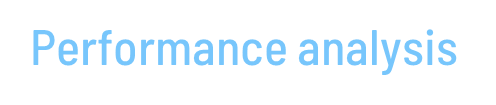

# logistic Regression Model Preformance

In [ ]:
# Predictions
y_pred_train_logreg = logreg_model.predict(X_train_scaled)
y_pred_test_logreg = logreg_model.predict(X_test_scaled)

# Performance metrics
print("Logistic Regression Model Performance:")
print("Training Accuracy:", accuracy_score(y_train, y_pred_train_logreg))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test_logreg))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_test_logreg))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test_logreg))

Logistic Regression Model Performance:
Training Accuracy: 1.0
Test Accuracy: 0.3168724279835391

Confusion Matrix:
[[ 36  26  14   0   7   1]
 [ 57 100  65   0  54  18]
 [  1   0   3   0   1   0]
 [ 12   9  13   0   2   3]
 [ 14  11  11   0  12   0]
 [  2   5   4   0   2   3]]

Classification Report:
              precision    recall  f1-score   support

      Anemia       0.30      0.43      0.35        84
    Diabetes       0.66      0.34      0.45       294
     Healthy       0.03      0.60      0.05         5
    Heart Di       0.00      0.00      0.00        39
    Thalasse       0.15      0.25      0.19        48
    Thromboc       0.12      0.19      0.15        16

    accuracy                           0.32       486
   macro avg       0.21      0.30      0.20       486
weighted avg       0.47      0.32      0.36       486



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Model visualization

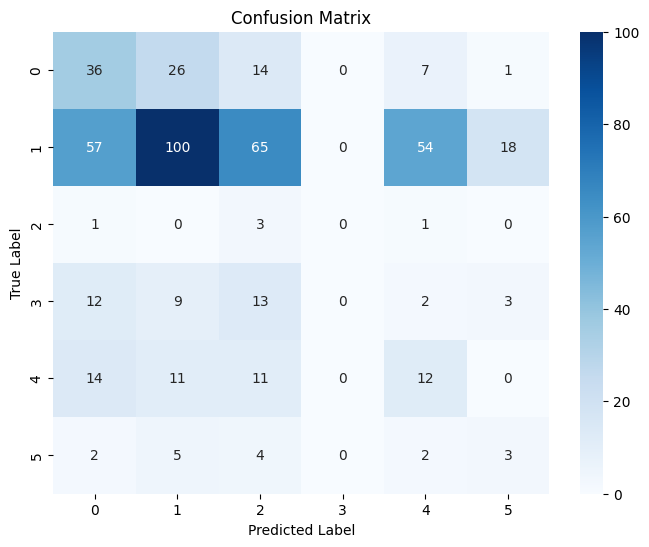

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_test_logreg), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()